In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import re
import copy
import pickle
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean, jaccard, hamming

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

In [ ]:
# df1 = pd.read_csv("Datasets/instagram_reach.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/instagram_reach.csv")
df1.sample()

In [ ]:
df1.reset_index(drop=True)
df1["Time"] = df1["Time since posted"].apply(lambda x: int(x.split(" ")[0]))
df1.drop(columns=["Unnamed: 0","S.No", "Caption", "USERNAME","Time since posted"], inplace=True)

In [ ]:
df1.info()

In [ ]:
df1.describe()

In [ ]:
print(df1.loc[:0]["Hashtags"])

In [ ]:
def convert_hastag(text):
    ps = PorterStemmer()
    wordnet = WordNetLemmatizer()

    tags = nltk.sent_tokenize(text)
    corpus = []
    tag = re.sub("[^a-zA-Z]", " ", text)
    tag = tag.lower()
    tag = tag.split()
#     tag = [wordnet.lemmatize(word) for word in tag if not word in set(stopwords.words("english"))]

    return tag

convert_hastag(df1["Hashtags"][0])

In [ ]:
hastag = pd.DataFrame()
df1["Hashtags"]= df1["Hashtags"].apply(convert_hastag)

In [ ]:
print(df1[["Hashtags"]])

In [ ]:
unique_hashtag = set(tag for row in df1["Hashtags"] for tag in row)
len(unique_hashtag)

In [ ]:
for hashtag in unique_hashtag:
    df1[hashtag] = 0 # initialize 0 value for every hashtag


In [ ]:
for index, row in enumerate(df1["Hashtags"]): # enumerate hashtags
    for tag in row: # Row wise hashtag
        df1.at[index, tag] = 1 # appply 1 value when index and tag match


In [ ]:
df1.drop(columns=["Hashtags"], inplace=True)

In [ ]:
x1 = df1.drop(columns=["Likes", "Time"])

In [ ]:
y1 = df1[["Likes", "Time"]]

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.1)

In [ ]:
print(f"X_train shape = {x1_train.shape}")
print(f"X_test shape = {x1_test.shape}")
print(f"y_train shape = {y1_train.shape}")
print(f"y_test shape = {y1_test.shape}")

In [ ]:
y1_test

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x1_train, y1_train)

In [ ]:
y1_pred = rf.predict(x1_test)
y1_pred

In [ ]:
mse1 = mean_squared_error(y1_test, y1_pred)
mse1

In [ ]:
rmse1 = np.sqrt(mse1)
rmse1

In [ ]:
r2score1 = r2_score(y1_test, y1_pred)
r2score1

In [ ]:
# df2 = pd.read_csv("DataSets/ObesityDataSet_raw_and_data_sinthetic.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
df2.head()

In [ ]:
df2.isnull().sum()

In [ ]:
df2.describe()

In [ ]:
df2.info()

In [ ]:
df2.sample(5)

In [ ]:
df2["SCC"].unique()

In [ ]:
df2[["Age", "Weight"]] = df2[["Age", "Weight"]].astype(int)

In [ ]:
df2["Gender"] = df2["Gender"].apply(lambda x : 1 if x == "Male" else 0)

In [ ]:
df2["SMOKE"] = df2["SMOKE"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2["family_history_with_overweight"] = df2["family_history_with_overweight"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2["FAVC"] = df2["FAVC"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2["SCC"] = df2["SCC"].apply(lambda x : 1 if x == "yes" else 0)

In [ ]:
df2

In [ ]:
df2["MTRANS"].unique()

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df2["CAEC"] =label_encoder.fit_transform(df2["CAEC"])

In [ ]:
df2["CALC"] = label_encoder.fit_transform(df2["CALC"])

In [ ]:
df2["MTRANS"] = label_encoder.fit_transform(df2["MTRANS"])

In [ ]:
df2["NObeyesdad"] = label_encoder.fit_transform(df2["NObeyesdad"])

In [ ]:
df2.sample(5)

In [ ]:
df2.info()

# 4 Different Classification algorithms

In [ ]:
x2 = df2.drop(columns=["NObeyesdad"])
y2 = df2["NObeyesdad"]

In [ ]:
y2

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2)

In [ ]:
log_r2 = LogisticRegression(solver="liblinear")

In [ ]:
log_r2.fit(x2_train, y2_train)

In [ ]:
y2_pred_log = log_r2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_log)

In [ ]:
knn2 = KNeighborsClassifier()

In [ ]:
knn2.fit(x2_train, y2_train)

In [ ]:
y2_pred_knn = knn2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_knn)

In [ ]:
svm2 = svm.SVC(kernel="linear")

In [ ]:
svm2.fit(x2_train, y2_train)

In [ ]:
y2_pred_svm = svm2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_svm)

In [ ]:
naive2 = MultinomialNB()

In [ ]:
naive2.fit(x2_train, y2_train)

In [ ]:
y2_pred_naive = naive2.predict(x2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_naive)

In [ ]:
# df_3 =  pd.read_json("DataSets/News_Category_Dataset_v3.json", lines=True)

df_3 =  pd.read_json("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/News_Category_Dataset_v3.json", lines=True)

In [ ]:
df_3.shape

In [ ]:
df_3_new = copy.deepcopy(df_3)

In [ ]:
df_3_new = df_3.sample(1100)
df_3_new.shape

In [ ]:
def link_filter(text):
    replace_text = text.replace("https://www.huffpost.com/entry/", "")
    replace_text = replace_text.replace("https://www.huffingtonpost.com/entry/", "")
    replace_text = replace_text.split("_")[0]
    replace_text = re.sub("[^a-zA-Z]", " ",replace_text )
    return replace_text

In [ ]:
df_3_new["link"]= df_3["link"].apply(link_filter)

In [ ]:
df_3_new.shape

In [ ]:
def text_preprecess(text, use_stop_word=True):
    ps = PorterStemmer()
#     wordnet = WordNetLemmatizer()

    tags = nltk.sent_tokenize(text)
    tag = re.sub("[^a-zA-Z]", " ", text)
    tag = tag.lower()
    tag = tag.split()
    tag = [ps.stem(word) for word in tag if not word in set(stopwords.words("english"))] if use_stop_word else tag

    return tag

In [ ]:
df_3_new["link"] = df_3_new["link"].apply(text_preprecess)

In [ ]:
df_3_new["headline"] = df_3_new["headline"].apply(text_preprecess)

In [ ]:
df_3_new["short_description"] = df_3_new["short_description"].apply(text_preprecess)

In [ ]:
df_3_new["authors"] = df_3_new["authors"].apply(text_preprecess, use_stop_word=False)

In [ ]:
df_3_new["category"] = df_3_new["category"].apply(text_preprecess, use_stop_word=False)

In [ ]:
df_3_new["tags"] = df_3_new["link"] + df_3_new["headline"] + df_3_new["short_description"] + df_3_new["category"] + df_3_new["authors"]

In [ ]:
df_3_new.drop(columns=["link", "headline", "short_description", "category", "authors","date"], inplace=True)

In [ ]:
df_3_new["tags"] = df_3_new["tags"].apply(lambda text : " ".join(text))

In [ ]:
df_3_new.shape

In [ ]:
df_3_new

In [ ]:
cv3 = CountVectorizer(max_features=1500)

In [ ]:
vector = cv3.fit_transform(df_3_new["tags"]).toarray()
vector.shape

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [ ]:
similarity

In [ ]:
# def euclidean_distance(point1, point2):
#     return np.linalg.norm(point1 - point2)

# # Function to find the most similar data point using Euclidean distance
# def find_most_similar_data(dataset, given_data):
#     distances = [euclidean_distance(given_data, data) for data in dataset]
#     most_similar_index = np.argmin(distances)
#     return dataset[most_similar_index]


# # Example usage:
# given_data = vector[0]  # The point for which we want to find the most similar point
# most_similar_data = find_most_similar_data(vector, given_data)

# print("Given data point:", given_data, vector.shape)
# print("Most similar data point:", most_similar_data, given_data.shape)

In [ ]:
data_array = vector

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

max_similarity = -1
most_similar_pair = (0, 0)

for i in range(len(data_array)):
    for j in range(i + 1, len(data_array)):
        similarity = cosine_similarity(data_array[i], data_array[j])
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_pair = (i, j)
            print(i,j,"max_similarity", max_similarity)


print("Cosine Most similar pair:", most_similar_pair)
print("Cosine Similarity score:", max_similarity)

In [ ]:
df_3_new.iloc[most_similar_pair[0]], df_3_new.iloc[most_similar_pair[1]]

In [ ]:
max_similarity= -1
most_similar_pair = (0, 0)

for i in range(len(data_array)):
    for j in range(i + 1, len(data_array)):
        distance = euclidean(data_array[i], data_array[j])
        similarity = 1 / (1 + distance)
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_pair = (i, j)
            print(i,j,"max_similarity", max_similarity)

print("Euclidean Most Similar pair:", most_similar_pair)
print("Euclidean Similarity score:", max_similarity)

In [ ]:
df_3_new.iloc[most_similar_pair[0]], df_3_new.iloc[most_similar_pair[1]]

In [ ]:
#Jaccard Similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union
    return similarity

most_similar_row = None
max_similarity = -1

for i in range(data_array.shape[0]):
    for j in range(i+1 , data_array.shape[0]):
        jaccard_similarity = 1 - jaccard(data_array[i], data_array[j])
        if jaccard_similarity > max_similarity:
            max_similarity = jaccard_similarity
            most_similar_row = i, j
            print(i,j, max_similarity)


# Print the indices of the most similar rows and their Jaccard similarity score
print(f"Jaccard Most similar rows: {most_similar_row[0]} and {most_similar_row[1]}")
print(f"Jaccard similarity score: {max_similarity}")

In [ ]:
df_3_new.iloc[most_similar_row[0]], df_3_new.iloc[most_similar_row[1]]

**correlation between Rows**

In [ ]:
from scipy.spatial.distance import euclidean, jaccard, hamming, correlation

In [ ]:
correlation(data_array[1], data_array[1])

In [ ]:
most_similar_row = None
max_correlation = -1

for i in range(data_array.shape[0]):
    for j in range(i+1 , data_array.shape[0]):
        corr = 1 - correlation(data_array[i], data_array[j])
        if corr > max_correlation:
            max_correlation = corr
            most_similar_row = i, j
            print(i,j, max_correlation)


# Print the indices of the most similar rows and their Jaccard similarity score
print(f"Most correlation similar rows: {most_similar_row[0]} and {most_similar_row[1]}")
print(f"correlation similarity score: {max_correlation}")

df_3_new.iloc[most_similar_row[0]], df_3_new.iloc[most_similar_row[1]]

In [ ]:
import pandas as pd
df_4 = pd.read_csv("DataSets/online_shoppers_intention.csv")
# df_4 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/online_shoppers_intention.csv")
df_4.shape

In [ ]:
df_4.sample(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import copy

# Data preprocessin
df_4["Weekend"] = df_4["Weekend"].apply(lambda x : 1 if x else 0)
df_4["Revenue"] = df_4["Revenue"].apply(lambda x : 1 if x else 0)

# Encode categorical features (e.g., Month, VisitorType) using LabelEncoder
label_encoder = LabelEncoder()
df_4['Month'] = label_encoder.fit_transform(df_4['Month'])
df_4['VisitorType'] = label_encoder.fit_transform(df_4['VisitorType'])

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
data = copy.deepcopy(df_4)

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=["Revenue"])
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Ensemble model using XGBoost and Random Forest
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('XGB', xgb_model), ('RF', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Total data: {accuracy:.2f}")

# Predicting whether it's a weekend or not
weekend_predictions = ensemble_model.predict(X_test)

# Finding Informational_Duration
informational_duration = X_test[['Informational_Duration', 'Weekend']]
# print("informational_duration", informational_duration)
# Now, you can work with 'weekend_predictions' and 'informational_duration' as needed.


# Train model on Weekend Dataset

In [ ]:
weekend_dataset = copy.deepcopy(df_4)
weekend_dataset.shape

In [ ]:
weekend_dataset = weekend_dataset[weekend_dataset["Weekend"] == 1]
weekend_dataset.shape

In [ ]:
weekend_dataset[["Informational_Duration"]].sum()

In [ ]:
weekend_X = data.drop(columns=["Revenue"])
weekend_y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weekend_X, weekend_y, test_size=0.25)

# Ensemble model using XGBoost and Random Forest
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('XGB', xgb_model), ('RF', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Weekend data: {accuracy:.4f}")

# Predicting whether it's a weekend or not
weekend_predictions = ensemble_model.predict(X_test)

In [ ]:
no_weekend_dataset = copy.deepcopy(df_4)
no_weekend_dataset.shape

In [ ]:
no_weekend_dataset.head()

In [ ]:
no_weekend_dataset = df_4[df_4["Weekend"] == 0]
no_weekend_dataset.shape, no_weekend_dataset[["Informational_Duration"]].sum()

In [ ]:
no_weekend_X = data.drop(columns=["Revenue"])
no_weekend_y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(no_weekend_X, no_weekend_y, test_size=0.25)

# Ensemble model using XGBoost and Random Forest
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('XGB', xgb_model), ('RF', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Without Weekend data: {accuracy:.4f}")
accuracy
# Predicting whether it's a weekend or not
weekend_predictions = ensemble_model.predict(X_test)
weekend_predictions

##### Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
import zipfile

zip_file_path = 'DataSets/Uber_ride.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open('rideshare_kaggle.csv') as csv_file:
        df5 = pd.read_csv(csv_file)

df5.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
562498,9e36792d-fbd6-43ed-bbcb-45890262c93a,1.543810e+09,4,3,12,2018-12-03 04:07:57,America/New_York,South Station,North Station,Lyft,...,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
71181,65e75ed3-c129-4cdb-96b9-29f4b7da57bb,1.543542e+09,1,30,11,2018-11-30 01:43:03,America/New_York,West End,Boston University,Lyft,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
248411,35cbf10b-4034-4e46-af74-deef1a8ac2d5,1.544958e+09,11,16,12,2018-12-16 11:05:08,America/New_York,South Station,North Station,Uber,...,0.1257,1544979600,38.48,1544954400,43.61,1544990400,34.01,1545019200,38.37,1544986800
468050,a74cf5f8-e88e-42ee-91c7-dd0a5b50380a,1.544793e+09,13,14,12,2018-12-14 13:05:07,America/New_York,Financial District,Northeastern University,Uber,...,0.0000,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600
458880,6fe54ded-2f0d-4f4e-8286-d4cf4a45b45c,1.545156e+09,18,18,12,2018-12-18 18:00:09,America/New_York,Haymarket Square,North Station,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200


In [ ]:
df5.shape

(693071, 57)

In [ ]:
df5.select_dtypes(include=['object']).sample()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
604339,b40a12d3-6e0f-4839-bc40-1aed47160247,2018-12-16 01:30:05,America/New_York,Fenway,Theatre District,Lyft,lyft_lux,Lux Black,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [ ]:
from sklearn.preprocessing import LabelEncoder
df5.dropna(inplace=True)
df5.drop(columns=["id","datetime","timestamp","timezone", "product_id", "long_summary"], inplace=True)

# Encode categorical features (e.g., Month, VisitorType) using LabelEncoder
label_encoder = LabelEncoder()
labels = ["icon","cab_type", "short_summary", "name", "destination", "source"]
for label in labels:
    df5[label] = label_encoder.fit_transform(df5[label])


In [ ]:
df5.sample(10)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
639885,4,3,12,4,6,1,10,7.0,1.21,1.0,...,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
520998,23,16,12,7,3,0,6,19.5,3.22,1.0,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
386912,20,27,11,4,3,0,3,32.5,3.80,1.0,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
598003,5,13,12,8,11,1,1,36.5,2.86,1.0,...,0.0001,1544716800,17.98,1544688000,33.82,1544731200,13.52,1544688000,32.84,1544734800
590248,20,27,11,0,3,0,3,16.5,1.38,1.0,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
248582,14,17,12,2,11,0,2,19.5,3.13,1.0,...,0.0185,1545066000,34.07,1545044400,41.39,1545076800,28.17,1545044400,35.93,1545076800
560616,15,28,11,1,2,1,9,8.0,2.32,1.0,...,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
683731,15,13,12,11,9,1,12,7.5,2.14,1.0,...,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800
573244,19,28,11,6,7,1,12,8.5,0.92,1.0,...,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
313967,17,15,12,7,8,0,6,19.5,3.33,1.0,...,0.0077,1544893200,39.80,1544929200,54.29,1544896800,36.78,1544929200,53.62,1544896800


In [ ]:
# df5.isna().sum()
df5["price"].isna().sum(), df5.shape

(0, (637976, 51))

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import folium

# Load and preprocess the dataset
data = df5
# Preprocess and feature extraction

# Unsupervised Learning - Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
data['cluster'] = kmeans.fit_predict(data)  # Use relevant features

# Supervised Learning - Price Prediction
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Visualization using Folium
m = folium.Map(zoom_start=10)

# Add cluster markers to the map
for cluster_id in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    for index, row in cluster_data.iterrows():
        folium.Marker([row['source'], row['source']], popup=f"Price: Dhiren").add_to(m)

m.save('map.html')


In [4]:
df7 = pd.read_csv("https://raw.githubusercontent.com/Dhirengit/PPT-Ineuron/main/DataSets/data7.csv")

In [5]:
df7.drop(columns=["filename"], inplace=True)

In [6]:
df7["label"].nunique()

10

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [8]:
# Drop non-numeric columns (if any)
df7_numeric = df7.select_dtypes(include=['number'])

# Standardize the data
scaler = StandardScaler()
df7_scaled = scaler.fit_transform(df7_numeric)


In [9]:
df7_scaled

array([[-0.57427442, -0.50201802,  0.01965207, ...,  0.11859349,
        -1.3965024 ,  1.0464641 ],
       [-0.84497384, -0.92400011, -0.88433656, ..., -0.76122978,
         1.5040354 ,  0.12680789],
       [ 1.14546309,  1.25624067, -1.5330166 , ..., -3.16164499,
        -2.31676643, -3.20477931],
       ...,
       [-0.57427442, -0.85366976, -0.07129998, ..., -0.34896317,
        -0.62264404, -0.96275995],
       [-0.25649683, -0.85366976, -0.4186674 , ..., -0.62348331,
         0.03517241, -0.59971023],
       [-1.54162676, -1.48664289, -0.22728422, ..., -0.23386705,
        -0.53844052, -0.81501978]])

In [10]:
df7["label"].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [11]:
df7.columns

Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

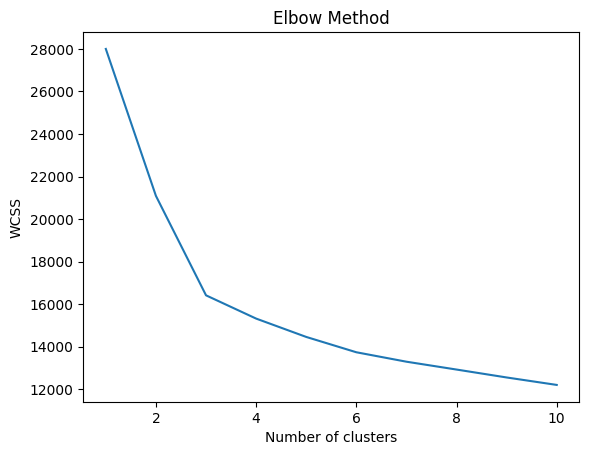

3    152
9    146
2    127
1    124
0    119
7     97
8     83
4     70
6     48
5     34
Name: Cluster, dtype: int64


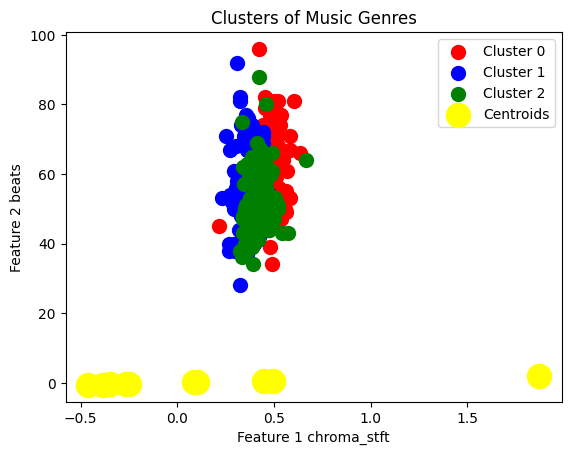

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# You should replace these with the actual feature columns from your dataset.
X7 = df7.drop(columns=["label"])  # Replace with your feature columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X7)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for "Within-Cluster-Sum-of-Squares"
plt.show()

# Based on the elbow method, choose the optimal number of clusters
# Let's say you choose 3 clusters based on the plot

# Apply K-Means clustering with the chosen number of clusters
num_clusters = 10  # Replace with the optimal number of clusters you determined
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df7['Cluster'] = cluster_labels

# Analyze the clusters
cluster_counts = df7['Cluster'].value_counts()
print(cluster_counts)

# Visualize the clusters
# You can choose any two features to create a scatter plot or use dimensionality reduction techniques like PCA or t-SNE for visualization.

# Example scatter plot (replace 'feature1' and 'feature2' with actual feature names)
plt.scatter(df7[df7['Cluster'] == 0]['chroma_stft'], df7[df7['Cluster'] == 0]['beats'], s=100, c='red', label='Cluster 0')
plt.scatter(df7[df7['Cluster'] == 1]['chroma_stft'], df7[df7['Cluster'] == 1]['beats'], s=100, c='blue', label='Cluster 1')
plt.scatter(df7[df7['Cluster'] == 2]['chroma_stft'], df7[df7['Cluster'] == 2]['beats'], s=100, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Music Genres')
plt.xlabel('Feature 1 chroma_stft')
plt.ylabel('Feature 2 beats')
plt.legend()
plt.show()


In [13]:
from sklearn.cluster import DBSCAN
# Density Based Spatial Clustering Applicaton With Noise

In [38]:
dbscan = DBSCAN(eps=3, min_samples=2)

In [39]:
dbscan.fit(X7)

DBSCAN(eps=3, min_samples=2)

In [40]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Q-8. Quora question pair similarity, you need to find the Similarity between two
questions by mapping the words in the questions using TF-IDF, and using a supervised
Algorithm you need to find the similarity between the questions.

In [5]:
import pandas as pd

df8 = pd.read_csv("DataSets/quora/train.csv")

df8.shape

(404290, 6)